# Homework 1

## References

+ Lectures 1-3 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, "savefig.dpi":300})
sns.set_context("notebook")
sns.set_style("ticks")

## Student details

+ **First Name: Ran**
+ **Last Name: An**
+ **Email: an141@purdue.edu**

## Problem 1

Disclaimer: This example is a modified version of the one found in a 2013 lecture on Bayesian Scientific Computing taught by Prof. Nicholas Zabaras.
I am not sure where the original problem is coming from.

We are tasked with assessing the usefulness of a tuberculosis test.
The prior information I is:

> The percentage of the population infected by tuberculosis is 0.4\%.
We have run several experiments and determined that:
+ If a tested patient has the disease, then 80\% of the time the test comes out positive.
+ If a tested patient does not have the disease, then 90\% of the time the test comes out negative.

To facilitate your analysis, consider the following logical sentences concerning a patient:

> A: The patient is tested and the test is positive.

> B: The patient has tuberculosis.

A. Find the probability that the patient has tuberculosis (before looking at the result of the test), i.e., $p(B|I)$. This is known as the base rate or the prior probability.<br>
**Answer:**


$p(B|I) = 0.4\% = 0.004$

B. Find the probability that the test is positive given that the patient has tuberculosis, i.e., $p(A|B,I)$.<br>
**Answer:**


$p(A|B,I) = 80\% = 0.8 $

C. Find the probability that the test is positive given that the patient does not have tuberculosis, i.e., $p(A|\neg B, I)$.<br>
**Answer:**

$p(A|\neg B, I)$ = 1 - $p(\neg A|\neg B, I)$ = 1 - 90% = 10% = 0.1

D. Find the probability that a patient that tested positive has tuberculosis, i.e., $p(B|A,I)$.<br>
**Answer:**

P(A|I) =  p(A,B|I) + p(A,$\neg$B|I)<br> 
where, P($\neg$B|I) = 1 - p(B|I) = 1 - 0.004 = 0.996 <br>
and, p(A,B|I) = P(A|B,I)P(B|I) = 0.8$*$0.004 = 0.0032 <br>
p(A,$\neg$B|I) = P(A|$\neg$B,I)P($\neg$B|I) = 0.1$*$0.996 = 0.0996 <br>
therefore, <br>
P(A|I) = P(A|B,I)P(B|I) + P(A|$\neg$B,I)P($\neg$B|I) = 0.8$*$0.004 + 0.1$*$0.996 = 0.1028 <br>
p(B|A,I) = p(A,B|I)/P(A|I) = 0.0032/0.1028 =0.0311284

E. Find the probability that a patient that tested negative has tuberculosis, i.e., $p(B|\neg A, I)$. Does the test change our prior state of knowledge about about the patient? Is the test useful?<br>
**Answer:**

p($\neg$A|I) = 1 - p(A|I) = 1 - 0.1028 = 0.8972 <br>
p($\neg$A,B|I) = p(B|I) - p(A,B|I) = 0.004 - 0.0032 = 0.0008 <br>
therefore, <br>
p(B|$\neg$A,I) = p($\neg$A,B|I)/p($\neg$A|I) = 0.0008/0.8972 = 0.00089166 <br>
If the patient was tested negative, the probability of have tuberculosis is about 0.001, which is a small number, compared to our prior state of knowledge. The test does not change our prior state of knowledge about about the patient. Thus, the test is useful.<br>

F. What would a good test look like? Find values for 

$$
p(A|B,I)= p(\text{test is positive} |\text{has tuberculosis},I),
$$

and

$$
p(A| \neg B, I) = p(\text{test is positive}|\text{does not have tuberculosis}, I),
$$

so that

$$
p(B|A, I) = p(\text{has tuberculosis}|\text{test is positive}, I) = 0.99.
$$

There are more than one solutions. How would you pick a good one? Thinking in this way can help you set goals if you work in R\&D. If you have time, try to figure out whether or not there exists such an accurate test for tuberculosis<br>
**Answer:**

P(A|I) = P(A|B,I)P(B|I) + P(A|$\neg$B,I)P($\neg$B|I) = P(A|B,I)$*$0.004 + P(A|$\neg$B,I)$*$0.996 <br>
p(A,B|I) = P(A|B,I)P(B|I) = P(A|B,I)$*$0.004 <br>
p(B|A,I) = p(A,B|I)/P(A|I) = 0.99 = P(A|B,I)$*$0.004/(P(A|B,I)$*$0.004 + P(A|$\neg$B,I)$*$0.996) <br>
derive from the above equation: <br>
P(A|B,I)$*$0.004 = P(A|B,I)$*$0.00396 + P(A|$\neg$B,I)$*$0.98604 <br>
P(A|B,I)$*$0.00004 = P(A|$\neg$B,I)$*$0.98604 <br>
P(A|B,I)/P(A|$\neg$B,I) = 24651 <br>
Let me assume that the probability of positive result from a infected patient is high,  P(A|B,I) = 0.99 <br>
Then, the probability of positive result from a healthy patient should be low, P(A|$\neg$B,I) = 0.99/24651 = 0.00004016


## Problem 2 - Practice with discrete random variables

Consider the Categorical random variable:

$$
X \sim \operatorname{Categorical}(0.3, 0.1, 0.2, 0.4),
$$

taking values in $\{0,1,2,3\}$. Find the following (you may use ``scipy.stats.rv_discrete`` or do it by hand):

A. The expectation $\mathbb{E}[X]$.

**Answer:**
<br><br>

In [5]:
# Import the scipy.stats library
import scipy.stats as st
# Define the probabilities:
ps = [0.3, 0.1, 0.2, 0.4] 
# And here are the corresponding values
xs = np.array([0, 1, 2, 3])
# Here is how you can define a categorical rv:
X = st.rv_discrete(name="Custom Categorical", values=(xs, ps))
print(f"E[X] = {X.expect():.2f}")

E[X] = 1.70


B. The variance $\mathbb{V}[X]$.

**Answer:**
<br><br>

In [6]:
print(f"V[X] = {X.var():.2f}")

V[X] = 1.61


C. Plot the probability mass function of $X$.

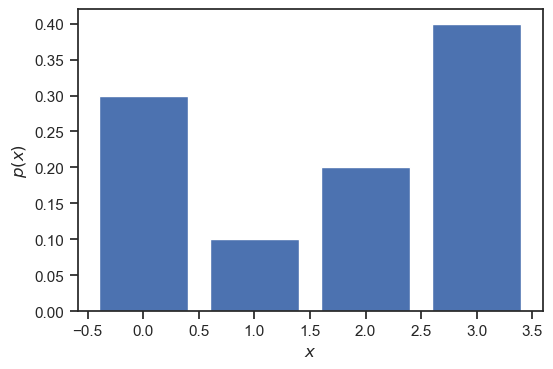

In [7]:
fig, ax = plt.subplots()
ax.bar(xs, X.pmf(xs))
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$");

D. Find the probability that $X$ is in $\{0, 2\}$.

**Answer:**
<br><br>

In [11]:
p = X.pmf(0) + X.pmf(2)
print(f"the probability is {p:.2f}")

the probability is 0.50


E. Find $\mathbb{E}[4X + 3]$.

**Answer:**
<br><br>

In [9]:
E = np.sum((4*xs+3) * X.pmf(xs))
print(f"E[exp(X)] = {E:.2f}")

E[exp(X)] = 9.80


F. Find $\mathbb{V}[4X+3]$.

**Answer:**
<br><br>

In [10]:
E_2 = np.sum((4*xs+3) ** 2 * X.pmf(xs))
V = E_2 - E ** 2
print(f"V[exp(X)] = {V:.2f}")

V[exp(X)] = 25.76


## Problem 3 - Predicting the probability of major earthquakes in Southern California

The [San Andreas fault](https://en.wikipedia.org/wiki/San_Andreas_Fault) extends through California forming the boundary between the Pacific and the North American tectonic plates.
It has caused some of the major earthquakes on Earth.
We are going to focus on Southern California and we would like to assess the probability of a major earthquake, defined as an earthquake of magnitude 6.5 or greater, during the next ten years.

A. The first thing we are going to do is go over a [database of past earthquakes](https://scedc.caltech.edu/significant/chron-index.html) that have occured in Southern California and collect the relevant data. We are going to start at 1900 because data before that time may are unreliable.
Go over each decade and count the occurence of a major earthquake (i.e., count the number of organge and red colors in each decade). We have done this for you.

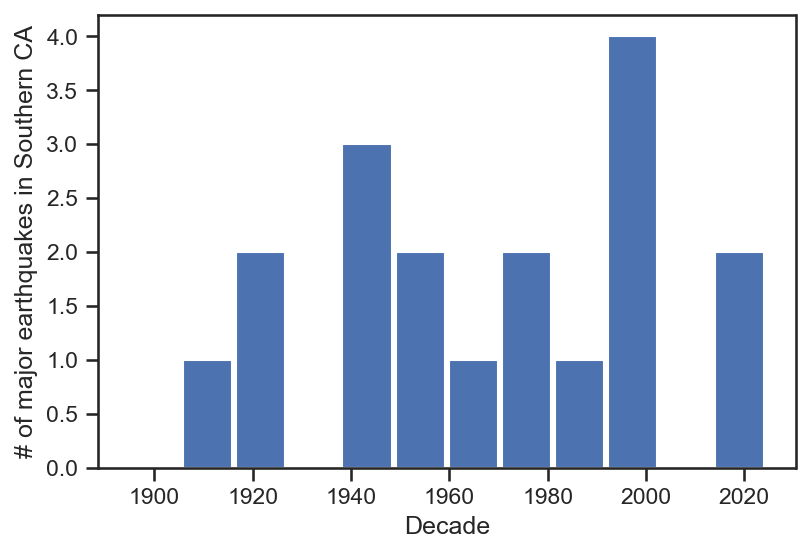

In [12]:
eq_data = np.array([
    0, # 1900-1909
    1, # 1910-1919
    2, # 1920-1929
    0, # 1930-1939
    3, # 1940-1949
    2, # 1950-1959
    1, # 1960-1969
    2, # 1970-1979
    1, # 1980-1989
    4, # 1990-1999
    0, # 2000-2009
    2 # 2010-2019 
])
fig, ax = plt.subplots(dpi=150)
ax.bar(np.linspace(1900, 2019, eq_data.shape[0]), eq_data, width=10)
ax.set_xlabel('Decade')
ax.set_ylabel('# of major earthquakes in Southern CA');

B. The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is a discrete distribution with values $\{0,1,2,\dots\}$ which is commonly used to model the number of events occuring in a certain time period.
It is the right choice when these events are happening independently and the probability of any event happening over a small period of time is constant.
Let's use the Poisson to model the number of earthquakes $X$ occuring in a decade.
We write:

$$
X \sim \operatorname{Poisson}(r),
$$

where $r$ is the *rate parameter* of Poisson.
The rate is the number of events per time period.
Here, $r$ is the number of earthquakes per decade.
Using the data above, we can set the rate as the empirical average of the observed number of earthquakes per decade:

In [13]:
r = np.mean(eq_data)
print('r = {0:1.2f} major earthquakes per decade'.format(r))

r = 1.50 major earthquakes per decade


Strictly speaking, **this is not how you should be calibrating models!!!**
We will learn about the **right** way (which uses Bayes' rule) in the subsequent lectures.
But it will do for now as the answer you would get using the **right** way is, for this problem, almost the same.
Let's define a Poisson distribution using ``scipy.stats.poisson`` (see documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)):

In [14]:
X = st.poisson(r)

A. Plot the probability mass function of ``X``.

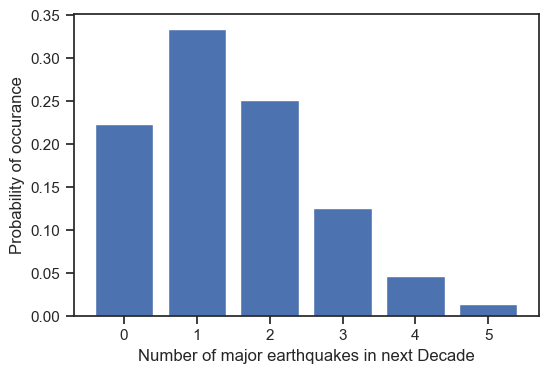

In [17]:
ks = range(6)
fig, ax = plt.subplots()
ax.bar(ks, X.pmf(ks))
ax.set_xlabel('Number of major earthquakes in next Decade')
ax.set_ylabel('Probability of occurance');

B. What is the probability that at least one major earthquake will occur during the next decade?<br>
**Answer:**
<br><br><br><br><br><br><br><br>

In [18]:
p = 1 - X.pmf(0)
print(f"the probablity that at least one major earthquake will occur during the next decade is {p:.2f}")

the probablity that at least one major earthquake will occur during the next decade is 0.78


C. What is the probability that at least one major earthquake will occur during the next two decades?
Hint: Consider two independent and identical copies of $X$, say $X_1$ and $X_2$.
And consider their sum $Y = X_1 + X_2$. Read [this](https://en.wikipedia.org/wiki/Poisson_distribution#Sums_of_Poisson-distributed_random_variables) about the sum of two independent Poisson distributions.
<br>
**Answer:**

E(Y) = E(X1 + X2) = E(X1)+E(X2) = 1.5 + 1.5 = 3 <br>
Assuming that the model for earth quakes in 2 decades is also Poisson distribution. The same as its 1 decades counterpart. 

In [23]:
Y = st.poisson(3.0)
p = 1 - Y.pmf(0)
print(f"the probablity that at least one major earthquake will occur during the next two decade is {p:.2f}")

the probablity that at least one major earthquake will occur during the next two decade is 0.95


D. What is the probability that at least one major earthquake will occur during the next five decades?<br>
**Answer:**

In [25]:
Z = st.poisson(1.5*5)
p = 1 - Z.pmf(0)
print(f"the probablity that at least one major earthquake will occur during the next two decade is {p:.5f}")

the probablity that at least one major earthquake will occur during the next two decade is 0.99945
